# Temporal-Difference Methods

In this notebook, you will write your own implementations of many Temporal-Difference (TD) methods.

While we have provided some starter code, you are welcome to erase these hints and write your code from scratch.

---

### Part 0: Explore CliffWalkingEnv

We begin by importing the necessary packages.

In [2]:
import sys
import gym
import numpy as np
from collections import defaultdict, deque
import matplotlib.pyplot as plt
%matplotlib inline

import check_test
from plot_utils import plot_values

Use the code cell below to create an instance of the [CliffWalking](https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py) environment.

In [3]:
env = gym.make('CliffWalking-v0')

The agent moves through a $4\times 12$ gridworld, with states numbered as follows:
```
[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]
```
At the start of any episode, state `36` is the initial state.  State `47` is the only terminal state, and the cliff corresponds to states `37` through `46`.

The agent has 4 potential actions:
```
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
```

Thus, $\mathcal{S}^+=\{0, 1, \ldots, 47\}$, and $\mathcal{A} =\{0, 1, 2, 3\}$.  Verify this by running the code cell below.

In [4]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


In this mini-project, we will build towards finding the optimal policy for the CliffWalking environment.  The optimal state-value function is visualized below.  Please take the time now to make sure that you understand _why_ this is the optimal state-value function.

_**Note**: You can safely ignore the values of the cliff "states" as these are not true states from which the agent can make decisions.  For the cliff "states", the state-value function is not well-defined._

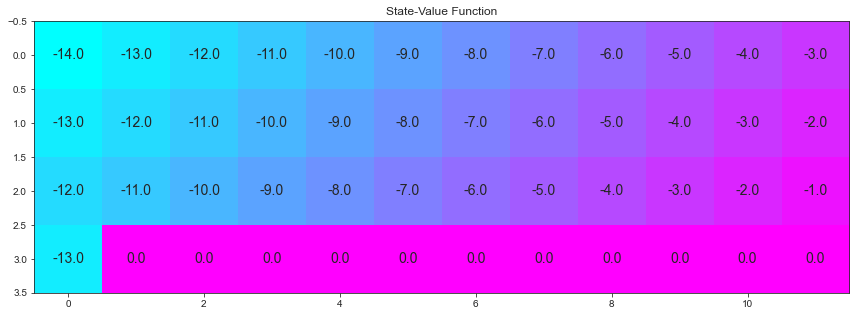

In [5]:
# define the optimal state-value function
V_opt = np.zeros((4,12))
V_opt[0:13][0] = -np.arange(3, 15)[::-1]
V_opt[0:13][1] = -np.arange(3, 15)[::-1] + 1
V_opt[0:13][2] = -np.arange(3, 15)[::-1] + 2
V_opt[3][0] = -13

plot_values(V_opt)

### Part 1: TD Control: Sarsa

In this section, you will write your own implementation of the Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [7]:
def epsilon_greedy_action(state, Q, epsilon):
    p = np.random.rand()  # Generate random float between 0 and 1
    if p > epsilon: # Pick the optimal action
        action = np.argmax(Q[state]) # Pick the best action to date for the given state
    else:
        action = env.action_space.sample()  # Pick a random action for the policy
    return action



To see epsilon in action:
https://observablehq.com/@katnoria/visualising-epsilon-decay#:~:text=In%20Reinforcement%20Learning%2C%20epsilon%20an,over%20the%20number%20of%20episodes.

In [8]:
# # Visualise explore / exploit balance, tune parameters
# num_episodes = 50_000
# epsilon = 0.5
# decay = 0.9995
# e_graph = np.zeros(shape = (num_episodes), dtype=float) # Empty numpy array
# step = int(num_episodes/100)
# for i_episode in range(1, (num_episodes+1), step):
#     e_graph[(i_episode)] = epsilon*(decay**(i_episode-1))
# print("Terminal epsilon = ", epsilon*(decay**(num_episodes)))
# plt.plot(e_graph)



In [9]:
# epsilon = 0.5
# num_episodes = 10
# explore_fraction = 0.1
# for i_episode in range(1,num_episodes+1):
#     epsilon_episode = epsilon * (1 - (i_episode-1)/(num_episodes*explore_fraction))
#     print(epsilon_episode)

In [10]:
def sarsa(env, num_episodes, alpha, gamma=1.0):
    # initialize action-value function (empty dictionary of arrays)
    Q = defaultdict(lambda: np.zeros(env.nA))
    for state in range(0, env.nS):  # for each possible state
        for action in range(0, env.nA):  # and for each possible action
            # Initialise all to zero, including the terminal state
            Q[state][action] = 0
        # TODO can test with all but terminal state large, terminal state zero - remember notes


    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 1_000 == 0:
            print("\rEpisode {:,}/{:,}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        # TODO: complete the function
        # Allow random exploration, balance exploration with exploitation
        # explore_fraction = 0.5 # first % of steps to use higher epsilon
        # epsilon = 0.8  # Pick epsilon between 0.05 and 0.1 normally.  This is the start epsilon
        # if (i_episode-1)/(num_episodes*explore_fraction) < 0.9: # Hunt for global optima for first xx% of iterations
        #     epsilon_episode = epsilon * (1 - (i_episode-1)/(num_episodes*explore_fraction)) # Linearly decrease epsilon
        # else:
        #     epsilon_episode = 0.01   # Exclusively exploit to converge policy to optimum.  This may not be zero



        # epsilon = 0.5 # Pick epsilon between 0.05 and 0.1 normally
        # decay = 0.9995
        # epsilon_episode = epsilon*(decay**(i_episode-1))
        epsilon_episode = 1/i_episode
        state_t = env.reset()  # Observe State 0 - state_t is now state zero
        # Choose Action 0 based on policy from Q
        action_t = epsilon_greedy_action(
            state_t, Q, epsilon_episode)  # action_t is now action zero
        # Initialise loop
        done = False
        # Now loop until terminal state is reached
        while not done:  # Until terminal state is reached
            # Take Action(t), observe R(t+1), S(t+1)
            state_t_plus_one, reward_t_plus_one, done, info = env.step(
                action_t)
            # Choose Action(t+1) using policy derived from Q
            action_t_plus_one = epsilon_greedy_action(
                state_t_plus_one, Q, epsilon_episode)
            Q[state_t][action_t] += alpha * (reward_t_plus_one + gamma * (
                Q[state_t_plus_one][action_t_plus_one]) - (Q[state_t][action_t]))
            action_t = action_t_plus_one
            state_t = state_t_plus_one
         

    return Q


Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

In [13]:
# Udacity way
Q = defaultdict(lambda: np.zeros(4))  # initialize empty dictionary of arrays
Q

# My effort using 10 states and 4 actions for demonstration purposes
Q = defaultdict(lambda: np.zeros(4))
for state in range(0, 10):  # for each possible state
    for action in range(0, 4):  # and for each possible action
        # Initialise all to zero, including the terminal state
        Q[state][action] = 0
Q

defaultdict(<function __main__.<lambda>()>, {})

defaultdict(<function __main__.<lambda>()>,
            {0: array([0., 0., 0., 0.]),
             1: array([0., 0., 0., 0.]),
             2: array([0., 0., 0., 0.]),
             3: array([0., 0., 0., 0.]),
             4: array([0., 0., 0., 0.]),
             5: array([0., 0., 0., 0.]),
             6: array([0., 0., 0., 0.]),
             7: array([0., 0., 0., 0.]),
             8: array([0., 0., 0., 0.]),
             9: array([0., 0., 0., 0.])})

Episode 500,000/500,000
Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[2 0 3 1 1 1 1 3 1 1 1 2]
 [1 1 2 1 1 1 1 1 2 2 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


**<span style="color: green;">PASSED</span>**

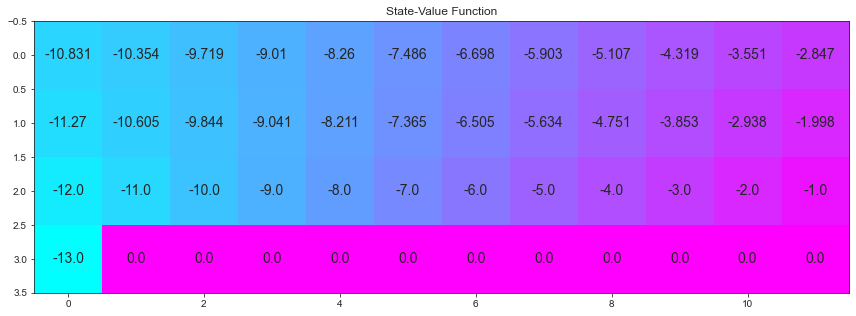

In [9]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsa = sarsa(env, 500_000, .001)

# print the estimated optimal policy
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])   
plot_values(V_sarsa)

### Part 2: TD Control: Q-learning

In this section, you will write your own implementation of the Q-learning control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [ ]:
def q_learning(env, num_episodes, alpha, gamma=1.0):
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(env.nA))
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        ## TODO: complete the function
        
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function. 

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

In [ ]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsamax = q_learning(env, 5000, .01)

# print the estimated optimal policy
policy_sarsamax = np.array([np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]).reshape((4,12))
check_test.run_check('td_control_check', policy_sarsamax)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsamax)

# plot the estimated optimal state-value function
plot_values([np.max(Q_sarsamax[key]) if key in Q_sarsamax else 0 for key in np.arange(48)])

### Part 3: TD Control: Expected Sarsa

In this section, you will write your own implementation of the Expected Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [ ]:
def expected_sarsa(env, num_episodes, alpha, gamma=1.0):
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(env.nA))
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        ## TODO: complete the function
        
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

In [ ]:
# obtain the estimated optimal policy and corresponding action-value function
Q_expsarsa = expected_sarsa(env, 10000, 1)

# print the estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_expsarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)])